In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first().date#latest_date

'2017-08-23'

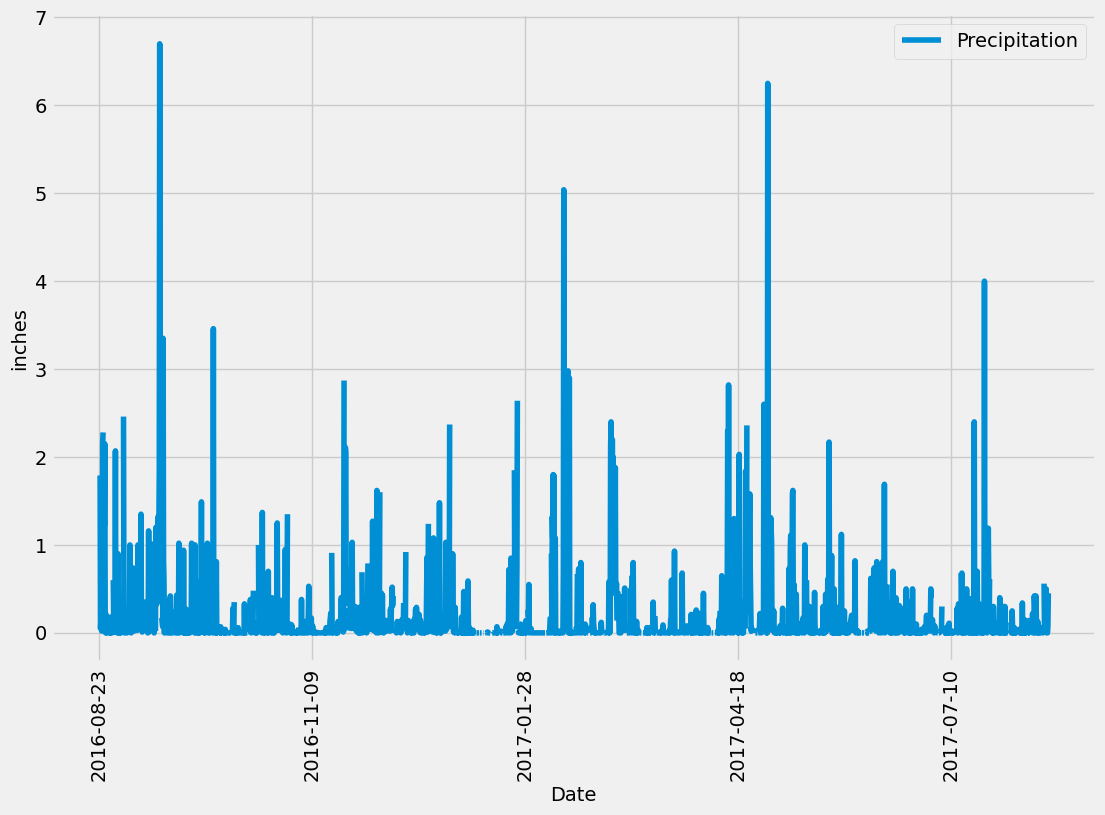

In [11]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)


data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    all()
data

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(data, columns = ['Date', "Precipitation"])
date_index =df.set_index('Date')

# Sort the dataframe by date

sorted_df = date_index.sort_values (by = 'Date')


# Use Pandas Plotting with Matplotlib to plot the data

#fig, ax = plt.subplots()
sorted_df.plot(figsize = (12,8), rot = 90,  x_compat = True,)

plt.xlabel("Date")

plt.ylabel("inches")
plt.show()

Text(0, 0.5, 'Inches')

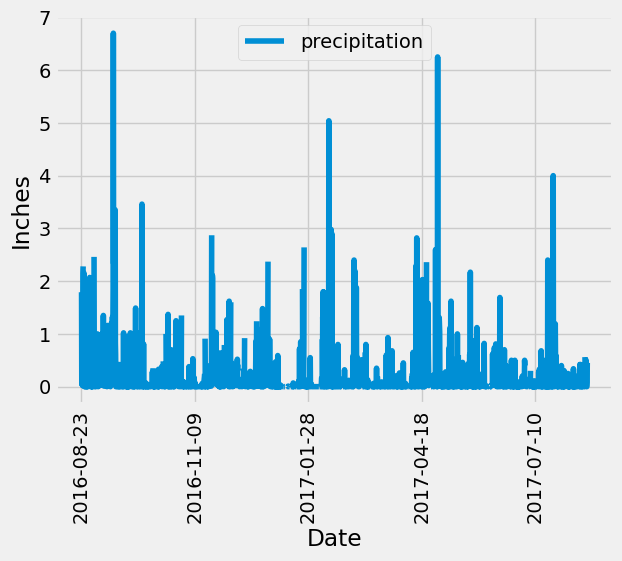

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()


9

In [55]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_st = stations[0][0]

most_active_data = (session
             .query(Measurement.station,func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
             .filter(Measurement.station == 'USC00519281')
             .all())
most_active_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

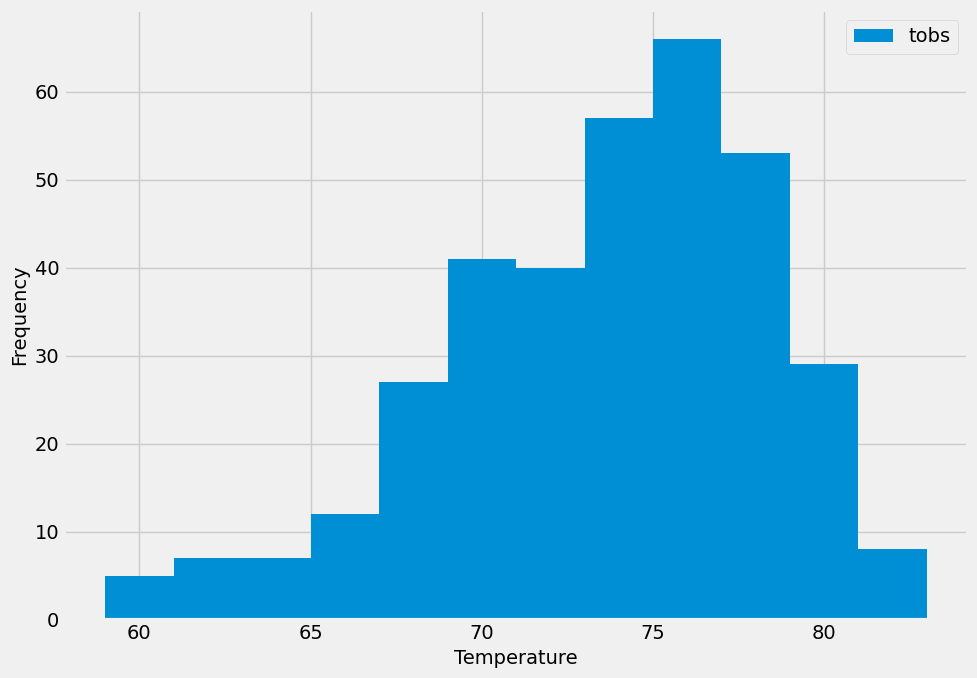

In [13]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_prior_year = (session
             .query(Measurement.station, Measurement.tobs)
             .filter(Measurement.date >= year_ago)
             .filter(Measurement.station == 'USC00519281')
             .all())

most_active_df = pd.DataFrame(most_active_prior_year)

#and plot the results as a histogram
most_active_df.plot.hist(figsize = (10,7), bins=12, legend=True)
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

# Close Session

In [77]:
# Close Session
session.close()